In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('ggplot')


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Percorso base
path = "/Users/BenedettaZanotti/Desktop/capstone project/"

# Caricamento CSV
products = pd.read_csv(path + "products.csv")
sales = pd.read_csv(path + "sales.csv")
customers = pd.read_csv(path + "customers_clean.csv")
staff = pd.read_csv(path + "staff.csv")
traffic = pd.read_csv(path + "store_traffic.csv")
stock = pd.read_csv(path + "stock_levels.csv")

# Conversione date
sales["Date"] = pd.to_datetime(sales["Date"])
traffic["Date"] = pd.to_datetime(traffic["Date"])
stock["Date"] = pd.to_datetime(stock["Date"])

# Colonna anno-mese
sales["YearMonth"] = sales["Date"].dt.to_period("M")

# Controllo di test
sales.head()


,ID,Date,Product_ID,Quantity,Unit_Price,Total,Staff_ID,Staff_Name,Sale_Time,Customer_ID,YearMonth
0,1,2024-04-01,10,1,399.00,399.00,1,Fabrizio,13:15,C1556,2024-04
1,2,2024-04-01,17,1,30.00,30.00,4,Katia,13:30,C0589,2024-04
2,3,2024-04-01,4,1,0.54,0.54,2,Angela,20:45,C1244,2024-04
3,4,2024-04-01,16,1,30.00,30.00,2,Angela,12:15,C1698,2024-04
4,5,2024-04-01,5,2,0.72,1.44,3,Laura,19:00,C1521,2024-04


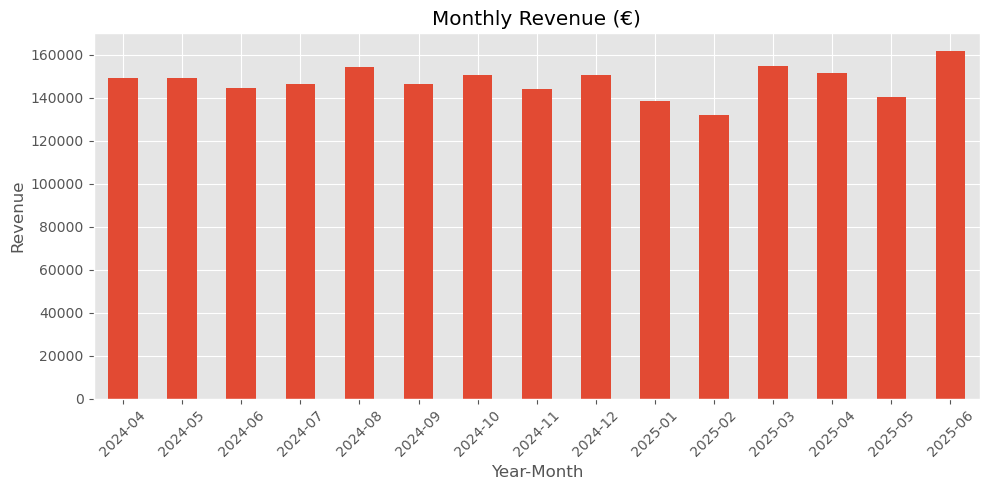

In [11]:
#1 Monthly revenue analysis. Goal: analyze monthly revenue trends to identify sales peaks, low-performing periods, and seasonality.

# Raggruppa per anno e mese, somma il fatturato
monthly_revenue = sales.groupby("YearMonth")["Total"].sum()

# Visualizzazione
monthly_revenue.plot(kind="bar", figsize=(10, 5), title="Monthly Revenue (€)")
plt.ylabel("Revenue")
plt.xlabel("Year-Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


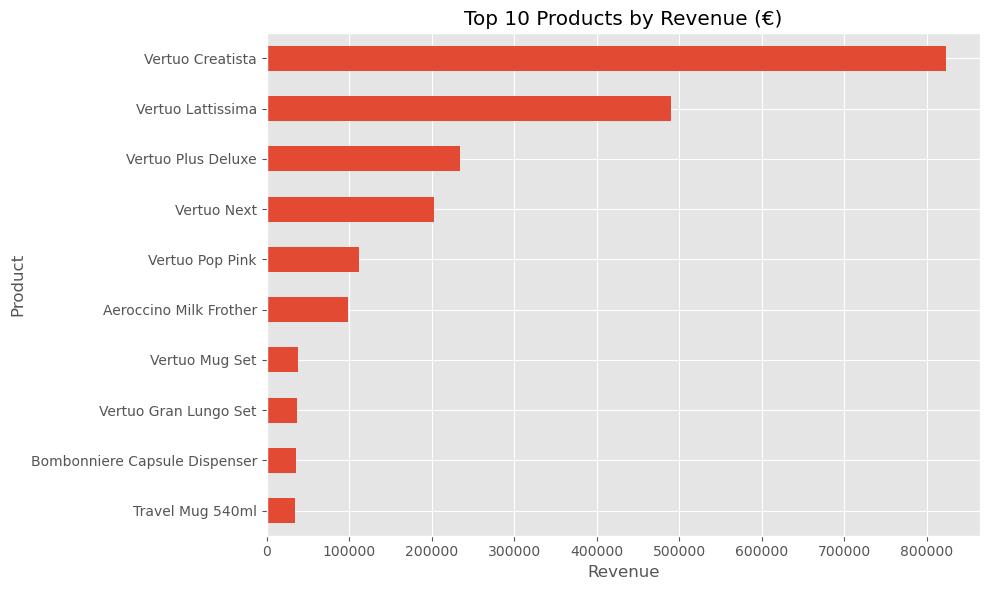

In [13]:
#2 Top 10 Products by Revenue. Goal: identify the top-selling products by total revenue and understand product performance.

# Join between sales and products to have the names 
sales_with_products = sales.merge(products, on="Product_ID")

# Raggruppo per nome prodotto, sommo il totale
top_products = sales_with_products.groupby("Product_Name")["Total"].sum()

# i 10 più alti
top_10_products = top_products.sort_values(ascending=False).head(10)

# Grafico
top_10_products.plot(kind="barh", figsize=(10, 6), title="Top 10 Products by Revenue (€)")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.gca().invert_yaxis()  # mostra il più venduto in alto
plt.tight_layout()
plt.show()


In [17]:
#3 Top Customers by spending. Goal: determine which customers spent the most, how often they purchased, and their average transaction value.

# Join tra sales e customers
sales_with_customers = sales.merge(customers, on="Customer_ID")

# Calcolo spesa totale per cliente
top_customers = sales_with_customers.groupby("Full_Name")["Total"].sum()

# i primi 10
top_10_customers = top_customers.sort_values(ascending=False).head(10)

# tabella
top_10_customers = top_10_customers.reset_index()
print(top_10_customers)


            Full_Name    Total
0    Matthew Martinez  3421.46
1        Patrick Wolf  3185.37
2          James West  3182.44
3      Rachel Esparza  3044.65
4       Ashley Rogers  3033.20
5     Michael Collins  2962.35
6   Elizabeth Mcclain  2935.96
7  Benjamin Maldonado  2920.27
8   Samantha Campbell  2895.72
9       Michael Moore  2860.91


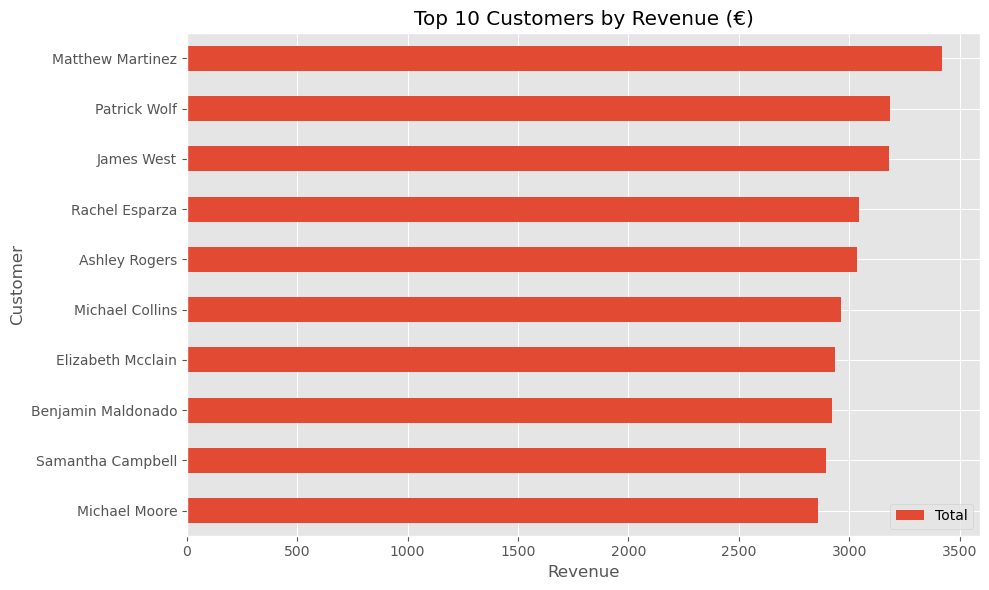

In [19]:
# grafico
top_10_customers.set_index("Full_Name").plot(kind="barh", figsize=(10,6), title="Top 10 Customers by Revenue (€)")
plt.xlabel("Revenue")
plt.ylabel("Customer")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [21]:
#4 Staff Sales Performance. Goal: evaluate each staff member's sales performance based on total revenue, number of transactions, and average ticket size.

# Calcolo KPI per ogni addetto
staff_performance = sales.groupby("Staff_Name").agg({
    "ID": "count",         # numero di vendite (scontrini)
    "Total": ["sum", "mean"]  # fatturato totale e scontrino medio
})

# Pulizia colonne
staff_performance.columns = ["Num_Sales", "Total_Revenue", "Avg_Ticket"]
staff_performance = staff_performance.sort_values(by="Total_Revenue", ascending=False)

# tabella
print(staff_performance)


            Num_Sales  Total_Revenue  Avg_Ticket
Staff_Name                                      
Laura            6331      560848.18   88.587613
Katia            6209      555637.76   89.489090
Fabrizio         6207      553461.00   89.167231
Angela           6117      545074.57   89.108153


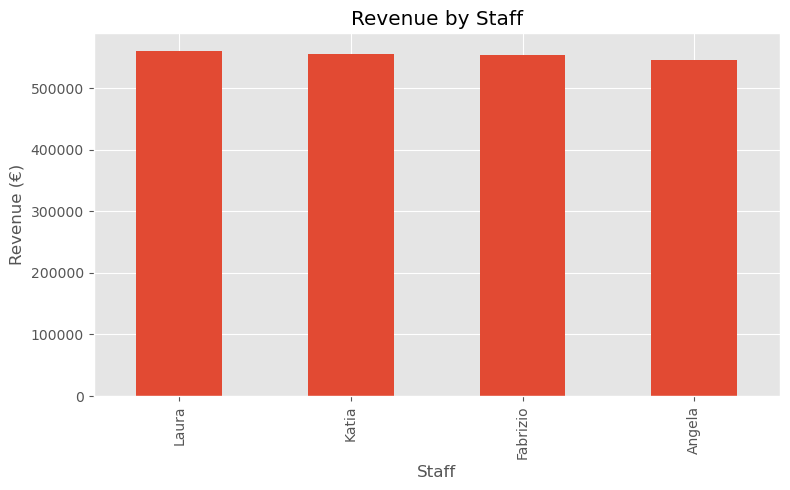

In [23]:
# visualizzazione vendite totali per acddetto

staff_performance["Total_Revenue"].plot(kind="bar", figsize=(8, 5), title="Revenue by Staff")
plt.ylabel("Revenue (€)")
plt.xlabel("Staff")
plt.tight_layout()
plt.show()


In [25]:
#5 Store Conversion Rate Analysis. Goal: Analyze the daily store 
# conversion rate by comparing foot traffic (number of visitors) 
# with actual sales transactions to evaluate how effectively the store converts visits into purchases.

# First, count number of sales per day
daily_sales = sales.groupby("Date")["ID"].count().reset_index().rename(columns={"ID": "Sales_Count"})

# Merge with foot traffic data
conversion = traffic.merge(daily_sales, on="Date", how="left")

# Fill days with no sales with 0
conversion["Sales_Count"] = conversion["Sales_Count"].fillna(0)

# Calculate conversion rate
conversion["Conversion_Rate"] = (conversion["Sales_Count"] / conversion["Total_Entries"]) * 100


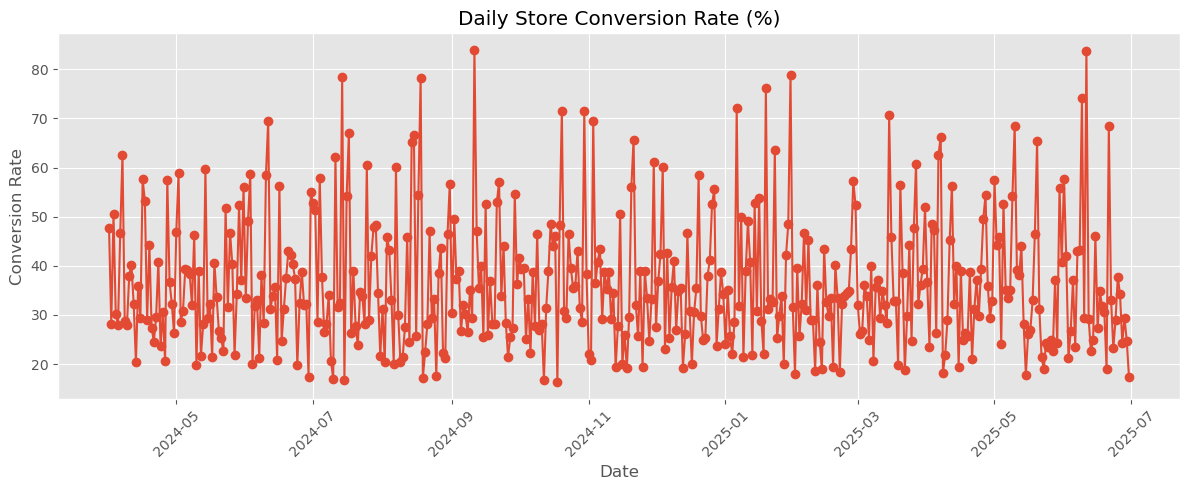

In [27]:
# Sort by date for clean plotting
conversion = conversion.sort_values("Date")

# Plot
plt.figure(figsize=(12,5))
plt.plot(conversion["Date"], conversion["Conversion_Rate"], marker='o', linestyle='-')
plt.title("Daily Store Conversion Rate (%)")
plt.xlabel("Date")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


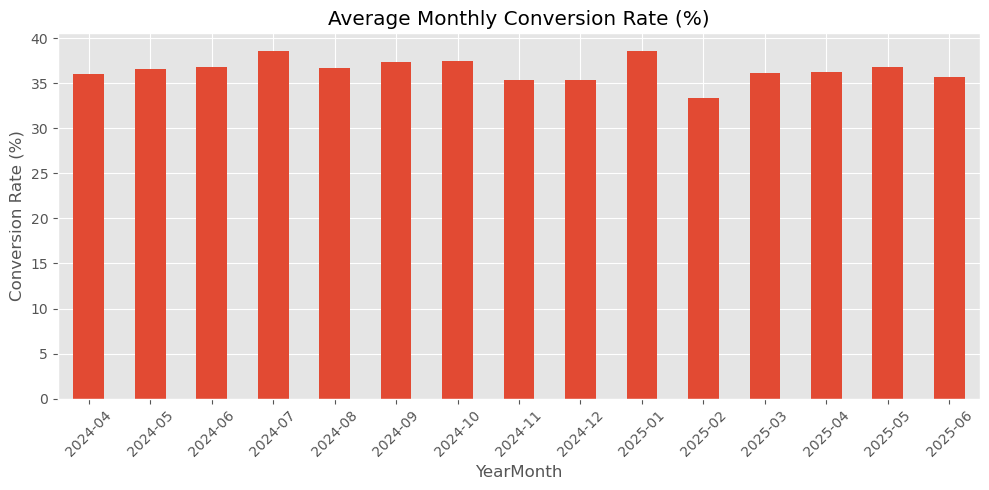

In [29]:
#  Monthly Average Conversion Rate

# Aggiunta colonna YearMonth
conversion["YearMonth"] = conversion["Date"].dt.to_period("M")

# Conversion rate medio mensile
monthly_conversion = conversion.groupby("YearMonth")["Conversion_Rate"].mean()

# Plot
monthly_conversion.plot(kind="bar", figsize=(10,5), title="Average Monthly Conversion Rate (%)")
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


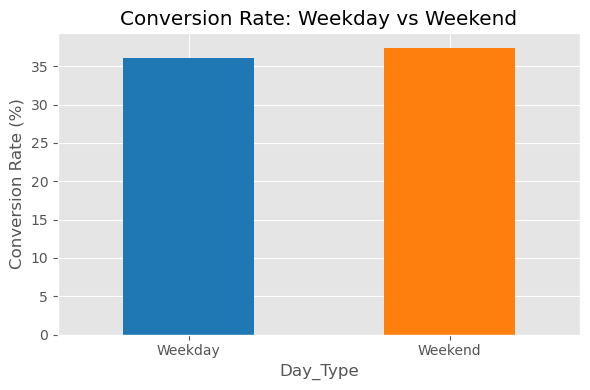

In [31]:
# Weekday vs Weekend Conversion Rate

# Aggiungi colonna con nome del giorno
conversion["Weekday"] = conversion["Date"].dt.day_name()

# Crea colonna 'Type' (Weekday vs Weekend)
conversion["Day_Type"] = np.where(conversion["Weekday"].isin(["Saturday", "Sunday"]), "Weekend", "Weekday")

# Conversion rate medio per tipo giorno
daytype_conversion = conversion.groupby("Day_Type")["Conversion_Rate"].mean()

# Plot
daytype_conversion.plot(kind="bar", figsize=(6,4), title="Conversion Rate: Weekday vs Weekend", color=["#1f77b4", "#ff7f0e"])
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


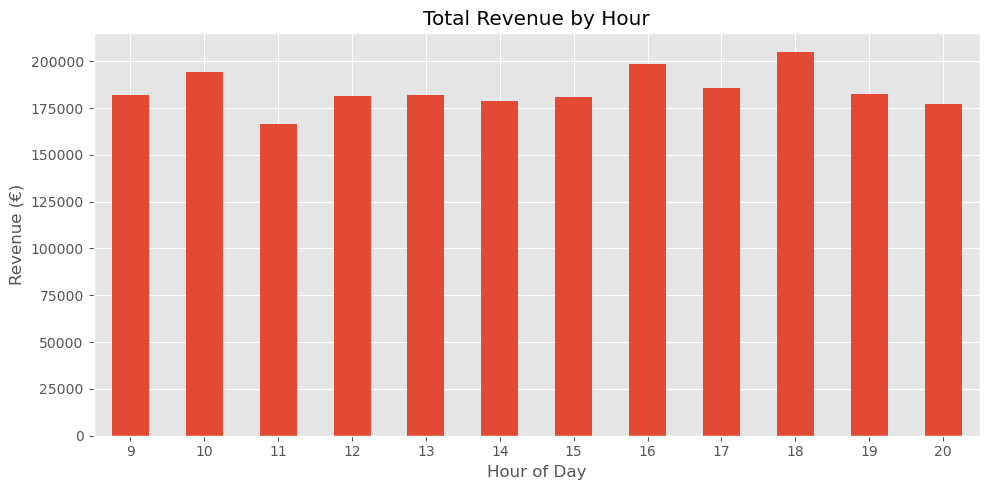

In [45]:
#6 Hourly Sales Performance. Goal: identify which times of day generate the most sales to optimize staff scheduling and in-store promotions.

hourly_sales = sales.groupby("Hour")["Total"].sum()

hourly_sales.plot(kind="bar", figsize=(10,5), title="Total Revenue by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Revenue (€)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [47]:
#7 Average Basket Size per Customer. Goal: measure the average value spent per purchase per customer to evaluate purchasing behavior and upselling opportunities.

# Unione vendite + clienti
sales_with_customers = sales.merge(customers, on="Customer_ID")

# KPI per cliente
basket_size = sales_with_customers.groupby("Full_Name").agg({
    "Total": "sum",
    "ID": "count"
}).rename(columns={"Total": "Total_Spent", "ID": "Num_Orders"})

# Calcolo scontrino medio
basket_size["Avg_Basket"] = basket_size["Total_Spent"] / basket_size["Num_Orders"]

# Visualizzo primi 10
basket_size.sort_values("Avg_Basket", ascending=False).head(10)


,Total_Spent,Num_Orders,Avg_Basket
Full_Name,,,
Debra Madden,699.00,1,699.000000
Jasmine Howard,399.00,1,399.000000
Denise Kim,1099.62,3,366.540000
Savannah Wolf,1400.77,4,350.192500
Renee Vasquez,1037.00,3,345.666667
Elizabeth Johnson,1352.00,4,338.000000
Gabriela Hoffman,1667.41,5,333.482000
Cameron Shelton,2299.69,7,328.527143
Paige Murphy,1624.00,5,324.800000


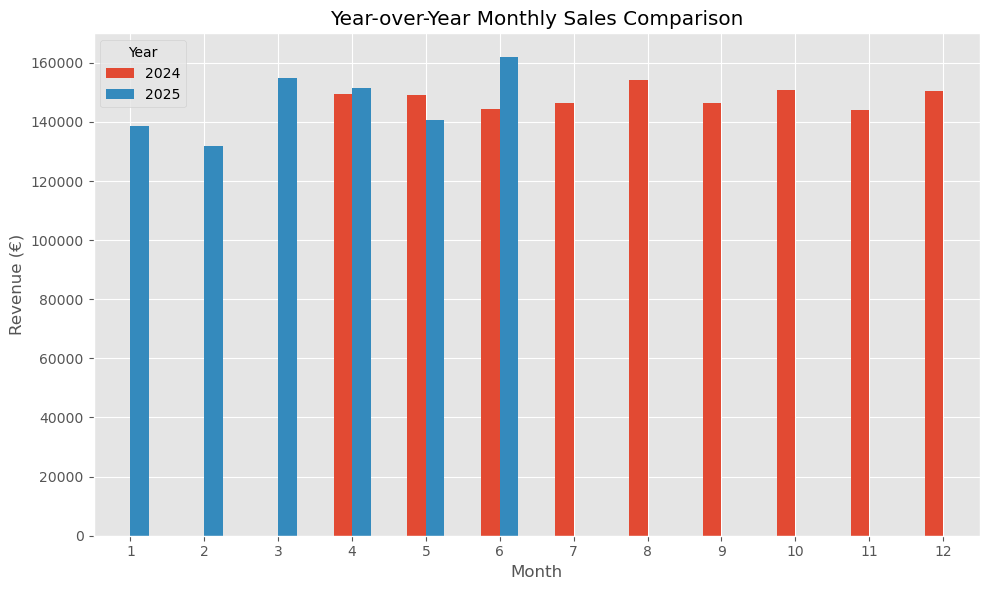

In [49]:
#8 Year-over-Year (YoY) Sales Comparison. Goal: compare sales trends between the current year and the previous year to identify growth, seasonality, or declines.

# Aggiungo colonne per anno e mese
sales["Year"] = sales["Date"].dt.year
sales["Month"] = sales["Date"].dt.month

# Fatturato per anno e mese
monthly_yoy = sales.groupby(["Year", "Month"])["Total"].sum().unstack(level=0)

# Plot comparativo
monthly_yoy.plot(kind="bar", figsize=(10,6), title="Year-over-Year Monthly Sales Comparison")
plt.xlabel("Month")
plt.ylabel("Revenue (€)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
